# Projet Analyse des données Heart disease

## Introduction :


Dans le cadre d’un projet analyse des données de la deuxième année cycle ingénieur en génie informatique à l’école nationale d’ingénieur de Carthage et pour appliquer les connaissances acquises pendant le cours de "Analyse des données", nous sommes amenés à réaliser un projet basé sur les méthode de l'ACP et de la classification K-means.



### Importation des données et bibliothèques



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.decomposition import PCA
import numpy

In [2]:
df=pd.read_csv("heart_cleveland_upload.csv") #lecture du dataset
#Référence dataset : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [5]:
df.shape  

(297, 14)

## Elimination des valeurs nulles, incohérents inexploitables et colonnes dupliquées.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

Value 0: upsloping
Value 1: flat
Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy

thal: A blood disorder called thalassemia

0 = normal;
1 = fixed defect;
2 = reversable defect
Condition:

Value 0 = No Disease;
Value 1 = Disease;

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
df.rename(columns = {'condition':'target'}, inplace = True)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [11]:
df["target"].unique() #returns all unique values

array([0, 1], dtype=int64)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='cp', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='fbs', ylabel='age'>,
        <AxesSubplot:xlabel='restecg', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='exang', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='slope', ylabel='age'>,
        <AxesSubplot:xlabel='ca', ylabel='age'>,
        <AxesSubplot:xlabel='thal', ylabel='age'>,
        <AxesSubplot:xlabel='target', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='cp', ylabel='sex'>,
        <AxesSubplot:xlabel='trestbps', ylabel='sex'>,
        <AxesSubplot:xlabel='chol', ylabel='sex'>,
        <AxesSubplot

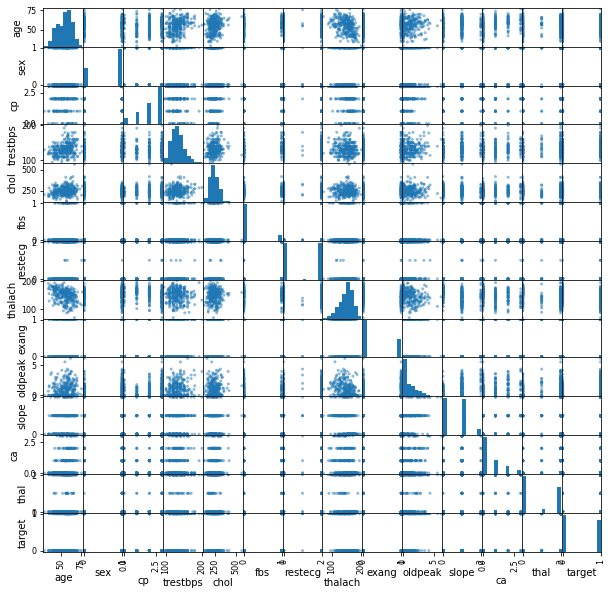

In [12]:
scatter_matrix(df,figsize=(10,10))

Matrice de **Covariance**

In [13]:
cov=df.cov()
cov

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,81.897716,-0.391755,0.964601,46.693682,95.356834,0.421251,1.349804,-81.917201,0.410194,2.080255,0.891778,3.077839,1.045819,1.026128
sex,-0.391755,0.219492,0.004027,-0.552075,-4.825621,0.006416,0.015800,-0.650218,0.031600,0.058221,0.009657,0.040438,0.166087,0.065145
cp,0.964601,0.004027,0.930954,-0.633782,3.616696,-0.019611,0.061345,-7.510704,0.171114,0.228679,0.090113,0.213486,0.245791,0.197027
trestbps,46.693682,-0.552075,-0.633782,315.517290,121.489410,1.132348,2.637478,-20.011694,0.556488,3.961336,1.330558,1.633736,2.219549,1.361407
chol,95.356834,-4.825621,3.616696,121.489410,2703.748589,0.232915,8.538345,-0.088953,1.449438,2.340278,-0.296217,5.660865,1.166075,2.084550
fbs,0.421251,0.006416,-0.019611,1.132348,0.232915,0.124238,0.024138,-0.063416,-0.000148,0.003416,0.010420,0.050334,0.017210,0.000557
restecg,1.349804,0.015800,0.061345,2.637478,8.538345,0.024138,0.989853,-1.650002,0.038266,0.131944,0.083117,0.120530,0.012956,0.082639
thalach,-81.917201,-0.650218,-7.510704,-20.011694,-0.088953,-0.063416,-1.650002,526.315270,-4.142347,-9.300300,-5.521214,-5.788732,-5.671057,-4.855094
exang,0.410194,0.031600,0.171114,0.556488,1.449438,-0.000148,0.038266,-4.142347,0.220675,0.158483,0.072766,0.065384,0.145282,0.098837
oldpeak,2.080255,0.058221,0.228679,3.961336,2.340278,0.003416,0.131944,-9.300300,0.158483,1.359842,0.417417,0.322410,0.375751,0.246922


### Centrer et réduire les données

In [14]:
from sklearn import preprocessing
df_cr = preprocessing.scale(df)

Matrice de **corrélation**

In [15]:
corr=df.corr()

In [16]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


<AxesSubplot:>

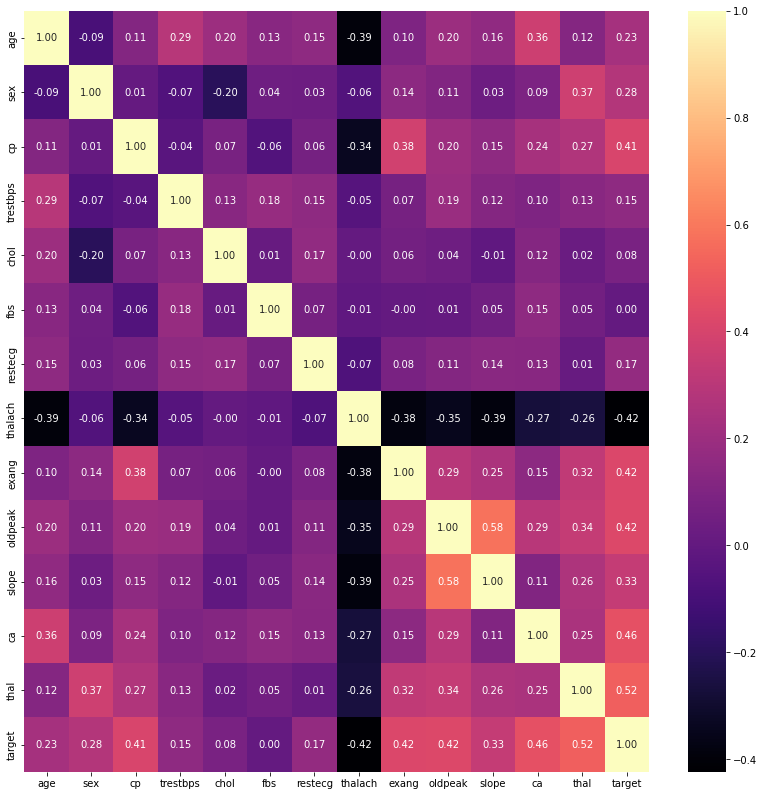

In [17]:
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,cmap="magma",fmt='.2f')

In [18]:
eig_vals, eig_vecs = np.linalg.eig(corr)

### Les valeurs et les vecteurs propres

In [19]:
eig_vals

array([3.60824442, 1.62477356, 1.24279546, 1.14396226, 0.33018872,
       0.36787669, 0.43369218, 0.46465627, 0.56815364, 1.00165783,
       0.69627709, 0.77991321, 0.85726734, 0.88054134])

In [20]:
eig_vecs

array([[ 0.24053549, -0.44322858,  0.01590806, -0.0741482 , -0.18610381,
         0.28517679,  0.48703716, -0.05519485,  0.14096228,  0.34875917,
         0.278374  ,  0.33506525,  0.21103358,  0.0890432 ],
       [ 0.1308981 ,  0.42802017, -0.49694338, -0.18694807,  0.13624242,
         0.07845948, -0.00207369, -0.55990004, -0.0125279 , -0.15053874,
         0.31516329,  0.15831411,  0.13298534,  0.12106471],
       [ 0.27378965,  0.13821378,  0.39789082, -0.290084  ,  0.10135065,
         0.03437627,  0.15210894, -0.39909199,  0.45044502,  0.03629891,
        -0.40503255, -0.04041831, -0.3137967 , -0.03512005],
       [ 0.14100437, -0.40381088, -0.30705922,  0.15706847,  0.18841602,
        -0.04806602, -0.21575188, -0.17109722, -0.03776823, -0.13025715,
        -0.3685335 ,  0.44205594, -0.01710464, -0.48430184],
       [ 0.07194476, -0.41319209,  0.2421796 , -0.28332722,  0.05886525,
        -0.03436179, -0.15520753, -0.19739628,  0.01576559, -0.39128305,
         0.45344171, -0.38

les valeurs propres superieurs a 1 sont 4: 3.60824442, 1.62477356, 1.24279546, 1.14396226
donc on va choisir 4 axes 

# Analyse ACP

In [21]:
pca = PCA(4)
acp = pca.fit_transform(df_cr)

In [22]:
pd.DataFrame(acp)

,0,1,2,3
0,-0.268497,2.642831,2.775324,0.891532
1,-1.084386,2.067849,0.143596,0.499909
2,0.071588,1.631391,-0.343179,3.919528
3,0.092195,2.091091,2.726380,0.363654
4,-0.315354,-0.208030,0.194892,1.573849
...,...,...,...,...
292,-0.757877,-1.616296,0.939875,-1.084579
293,0.426856,-2.520544,-0.088533,0.284633
294,1.243018,-3.225847,-0.462855,0.503797
295,-2.451173,-0.853468,-0.736412,0.631335


In [23]:
pca.components_

array([[ 0.24053549,  0.1308981 ,  0.27378965,  0.14100437,  0.07194476,
         0.05329646,  0.12980794, -0.35044615,  0.31004575,  0.35426644,
         0.30531715,  0.29279267,  0.32774835,  0.41771765],
       [ 0.44322858, -0.42802017, -0.13821378,  0.40381088,  0.41319209,
         0.2526208 ,  0.26954322,  0.00688387, -0.1784161 , -0.01165261,
        -0.01528699,  0.1616287 , -0.24230132, -0.11789585],
       [-0.01590806,  0.49694338, -0.39789082,  0.30705922, -0.2421796 ,
         0.51315072,  0.07889399,  0.23558664, -0.19630072,  0.02174672,
        -0.03750405,  0.11186481,  0.24875965,  0.04102758],
       [-0.0741482 , -0.18694807, -0.290084  ,  0.15706847, -0.28332722,
        -0.05307562, -0.0538794 , -0.11135087, -0.06704487,  0.4317407 ,
         0.61465013, -0.35947467, -0.13829209, -0.18789179]])

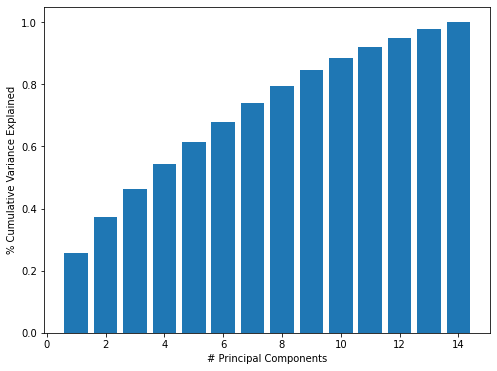

In [24]:
pca = PCA(n_components=14)
pca.fit(df_cr)
X_pca = pca.transform(df_cr)
# Calculate cumulative explained variance across all PCs

cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(list(range(1,15)), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

### La contribtion commutative des 14 axes

In [25]:
def plot_circle(df,axe1,axe2):
  # Plot a variable factor map for the first two dimensions.
  (fig, ax) = plt.subplots(figsize=(8, 8))
  for i in range(0, pca.components_.shape[1]):
      ax.arrow(0,
              0,  # Start the arrow at the origin
              pca.components_[axe1, i],  #0 for PC1
              pca.components_[axe2, i],  #1 for PC2
              head_width=0.05,
              head_length=0.1)

      plt.text(pca.components_[axe1, i] + 0.05,
              pca.components_[axe2, i] + 0.08,
              df.columns.values[i])


  an = np.linspace(0, 2 * np.pi, 100)
  plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
  plt.axis('equal')
  ax.set_title('Variable factor map')
  plt.show()

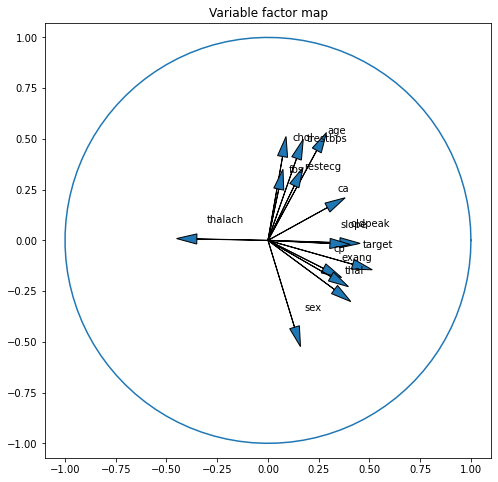

In [26]:
plot_circle(df,0,1)

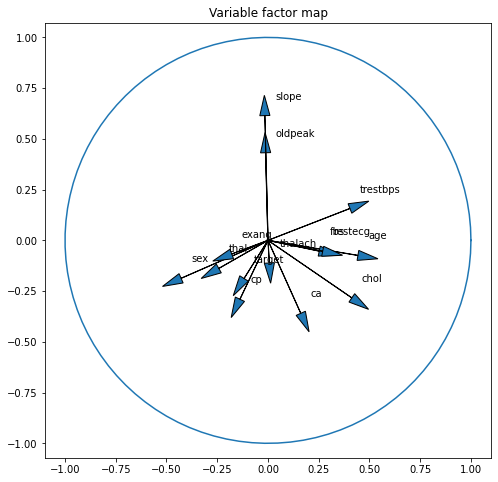

In [27]:
plot_circle(df,1,3)

In [28]:
def plot_scatter(df,axe1,axe2,hue):
  return sns.scatterplot(data=df, x=axe1, y=axe2, hue=hue)


In [29]:
acp =  pd.DataFrame(acp , columns=['axe1','axe2','axe3','axe4'])

In [30]:
acp

,axe1,axe2,axe3,axe4
0,-0.268497,2.642831,2.775324,0.891532
1,-1.084386,2.067849,0.143596,0.499909
2,0.071588,1.631391,-0.343179,3.919528
3,0.092195,2.091091,2.726380,0.363654
4,-0.315354,-0.208030,0.194892,1.573849
...,...,...,...,...
292,-0.757877,-1.616296,0.939875,-1.084579
293,0.426856,-2.520544,-0.088533,0.284633
294,1.243018,-3.225847,-0.462855,0.503797
295,-2.451173,-0.853468,-0.736412,0.631335


<AxesSubplot:xlabel='axe2', ylabel='axe4'>

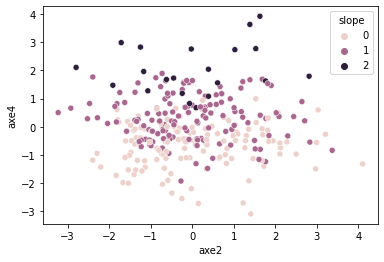

In [31]:
plot_scatter(acp,"axe2","axe4",df["slope"])


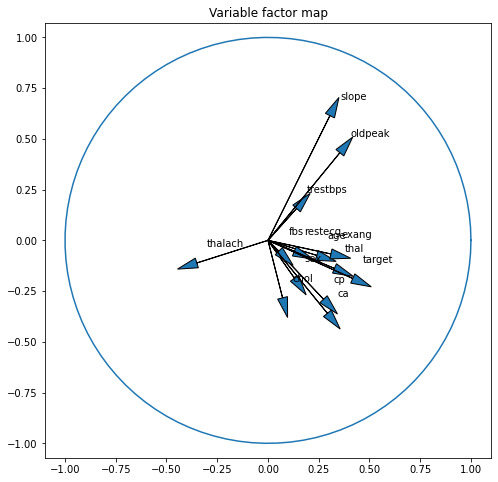

In [32]:
plot_circle(df,0,3)

### Interpretation :

slope et old peak sont les plus représentés sur l'axe 4 sachant que le sens positive de l'axe 4 est vers le haut.

<AxesSubplot:xlabel='axe1', ylabel='axe4'>

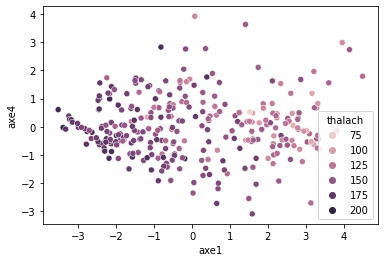

In [33]:
plot_scatter(acp,"axe1","axe4",df["thalach"])

### Interpretation:


thalach est bien représenté sur l'axe1 et le sens positive de l'axe 1 est dirigé vers la gauche

## Clustering K-means 


In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(acp)

In [35]:
from sklearn.metrics import accuracy_score

AxesSubplot(0.125,0.125;0.775x0.755)


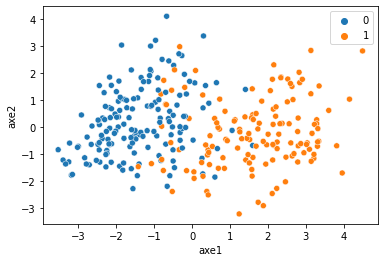

In [36]:
print(plot_scatter(acp,'axe1','axe2',list(df['target'])))

AxesSubplot(0.125,0.125;0.775x0.755)


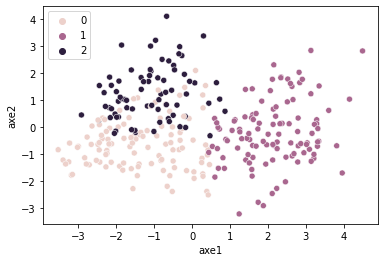

In [37]:
print(plot_scatter(acp,'axe1','axe2',kmeans.labels_))

## Conclusion :

En conclusion, ce projet nous a permis de nous servir de nos connaissances théoriques en analyse de données, de maîtriser l'aspect technique (programmation python) et de les mettre dans le cadre pratique. Ça nous a permis d'approfondir nos connaissances en Python et d'assimiler sa puissance qui est d'une syntaxe claire.
Enfin, ce projet était le résultat d'une analyse d'une base de données Heart_Diseases et un partage des connaissances entre tous les membres de notre ce qui nous a permis d'absorber la pression et de constituer un noyau solide.


Réalisé par:
Oumayma SAIDI
Chaima MEZGAR
Emna OUERGHI
Oumayma REDISSI